In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [2]:
digits=datasets.load_digits()
print("Number of rows(Samples):", digits.data.shape[0])
print("number of columns(Features)", digits.data.shape[1] )
print("Feature Names:", digits.feature_names if hasattr(digits, "feature_names") else "Image_pixels(8x8)")
print("Target Names:", np.unique(digits.target))

Number of rows(Samples): 1797
number of columns(Features) 64
Feature Names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Target Names: [0 1 2 3 4 5 6 7 8 9]


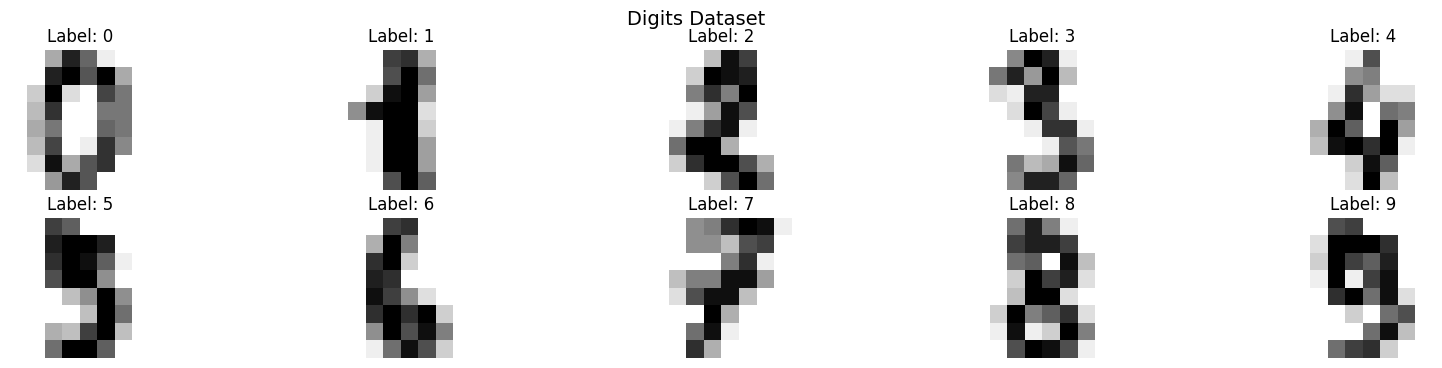

In [3]:
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
  plt.title("Label: %i" % digits.target[i])
  plt.axis('off')
plt.suptitle("Digits Dataset", fontsize=14)
plt.show()

In [4]:
X_train,X_test,y_train,y_test=train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [5]:
from sklearn.svm import SVC
svm_model=SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
y_pred=svm_model.predict(X_test)

In [7]:
cm=confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
error_rate=1-accuracy


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Error Rate:", error_rate)

Accuracy: 0.9861111111111112
Precision: 0.9871533861771657
Recall: 0.9865978306216103
Error Rate: 0.01388888888888884


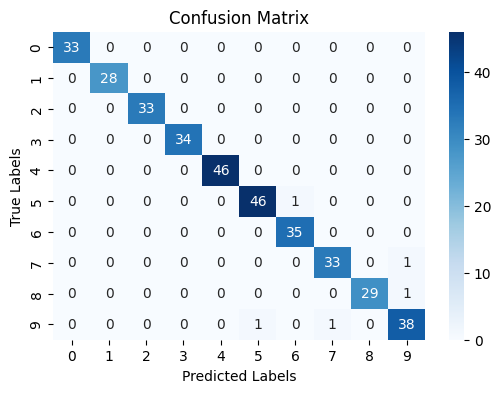

In [8]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

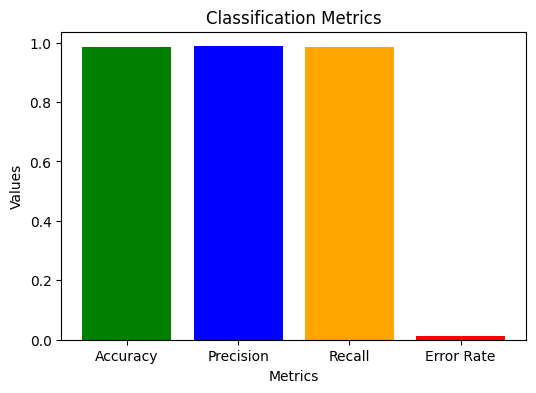

In [9]:
plt.figure(figsize=(6, 4))
metrics=['Accuracy', 'Precision', 'Recall', 'Error Rate']
values=[accuracy, precision, recall, error_rate]
plt.bar(metrics, values, color=['green', 'blue','orange', 'red'])
plt.title('Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()